In [77]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import matplotlib.ticker as ticker

def gauss_function(x, a, x0, sigma):
    return a * np.exp(-(x - x0) ** 2 / (2 * sigma ** 2))

In [203]:
data = np.loadtxt('data/Langzeit_579474.388s.tka', delimiter=',', skiprows=2)
data = data / np.max(data)
channels = np.arange(2, len(data)+2)
max_channel = channels[np.argmax(data)]

def channel2Energie(c):
    return c * 5.4857 / max_channel;

energies = channel2Energie(channels)

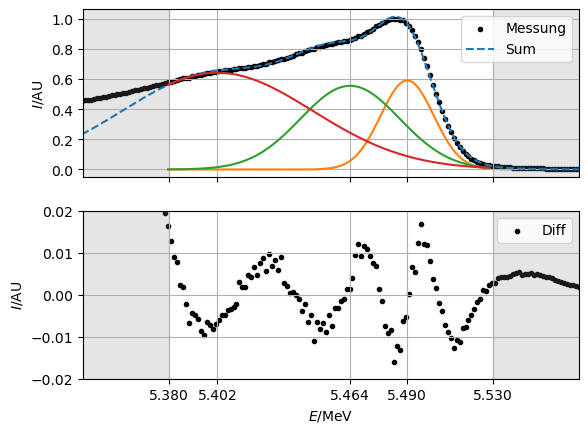

In [205]:
fig, (ax, ax2) = plt.subplots(2, 1, sharex=True)
ax.scatter(energies, data, marker='.', c='k', label="Messung")

#ax.stairs(data[0:-1], energies, color='k', alpha=0.5, label="Messung")
#ax.hist(data, bins=1000, label="Data")

def fit_function(E, E1, sigma1, a1, E2,  sigma2, a2, E3, sigma3, a3):
    return gauss_function(E, a1, E1, sigma1) +\
    gauss_function(E, a2, E2, sigma2) +\
    gauss_function(E, a3, E3, sigma3)


E_start = 5.38
E_end = 5.53

def E2Index(E):
    return np.argmin(np.abs(energies-E))

i_start = E2Index(E_start)
i_end = E2Index(E_end)

p0 = (5.4857,19e-3, 0.6, 5.443, 54e-3, 0.5, 5.388, 80e-3, 0.5)

coeff, _ = curve_fit(fit_function, energies[i_start:i_end], data[i_start:i_end], p0=p0)

ax.plot(energies, fit_function(energies, *coeff), linestyle='--', label="Sum")

ax.plot(energies[i_start:i_end], gauss_function(energies[i_start:i_end],coeff[2], coeff[0], coeff[1]))
ax.plot(energies[i_start:i_end], gauss_function(energies[i_start:i_end],coeff[5], coeff[3], coeff[4]))
ax.plot(energies[i_start:i_end], gauss_function(energies[i_start:i_end],coeff[8],  coeff[6], coeff[7]))


ax.set_xticks([coeff[0], coeff[3], coeff[6], E_end, E_start])
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.3f'))
#ax.set(xlim=[5.54, 5.57], xlabel=r"$E / \mathrm{MeV}$", ylabel=r"$I / \mathrm{AU}$")
ax.set(xlim=[E_start - 0.04, E_end + 0.04], ylabel=r"$I / \mathrm{AU}$")
ax.axvspan(E_start, energies[0], alpha=0.2, color='grey')
ax.axvspan(E_end, energies[-1], alpha=0.2, color='grey')
ax.grid()
ax.legend()


ax2.scatter(energies, data - fit_function(energies, *coeff), marker='.', c='k', label="Diff")
ax2.axvspan(E_start, energies[0], alpha=.2, color='grey')
ax2.axvspan(E_end, energies[-1], alpha=.2, color='grey')
ax2.set(ylim=[-.02, .02], xlabel=r"$E / \mathrm{MeV}$", ylabel=r"$I / \mathrm{AU}$")
ax2.legend(loc=1)
ax2.grid()

fig.savefig('out/langzeit1.svg')
